In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(0)
mu=0;
sigma=1;
class1=np.array([np.random.normal(mu,sigma,1000),np.ones(1000)])
class2=np.array([np.random.normal(mu,sigma,1000),np.ones(1000)])
class1.shape=(1000,2)
class2.shape=(1000,2)
label1=np.ones(1000)
label2=-label1
label1.shape=(1000,1)
label2.shape=(1000,1)
test_data=[class1,class2]
test_label = [label1, label2]
test_data=np.row_stack(test_data)
true_label=np.row_stack(test_label)

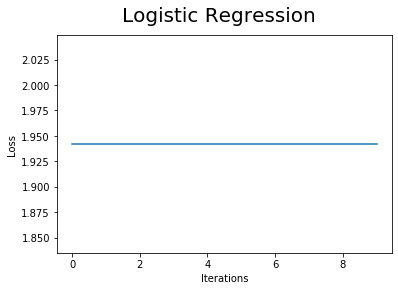

In [4]:
w=np.zeros([2,1])
eta=0.0001
epochs=1000
error=np.zeros(epochs)
for i in range (epochs):
    sigmoid=np.zeros([2000,1])
    yiWtxSamples=np.zeros([2000,1])
    yixi=np.zeros([2000,2])
    for j in range(2000):
        yiWtx=true_label[j]*np.matmul(w.T,test_data[j,:].T)
        sig_samples=1/(1+np.exp(-yiWtx))
        yiWtxSamples[j]=np.exp(yiWtx)
        sigmoid[j]=sig_samples
        yixi[j]=true_label[j,:]*test_data[j,:].T
       
    secndterm=np.matmul(np.matmul(yiWtxSamples,(sigmoid**2).T),yixi)
    delJ=np.matmul((true_label.T-sigmoid.T),secndterm)
    delJ=delJ/np.max(delJ)
   
    Wupdate=w-eta*delJ.T
    w=Wupdate
    ylabel=np.zeros([2000,1])
    for k in range(2000):
        test_data1=test_data.T
        predicted=np.matmul(w.T,test_data1[:,k])
   
        if predicted>=0:
            ylabel[k]=1
        else:
            ylabel[k]=-1
   
   
    error[i]=np.mean((true_label-ylabel)**2)

iterations=np.arange(epochs)
fig = plt.figure()
fig.suptitle('Logistic Regression', fontsize=20)
plt.plot(iterations,error) 
plt.xlabel('Iterations')
plt.ylabel('Loss')
fig.savefig('test1.png')
plt.show()

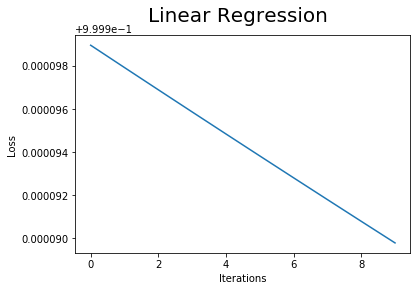

In [5]:
mean=0
std=1
class1 = np.random.normal(mean,std,1000)
class1=class1.reshape(1000,1)

class2 = np.random.normal(mean,std,1000)
class2=class2.reshape(1000,1)

label1= np.ones(1000)
label2 = -(label1)

label1=label1.reshape(1000,1)
label2=label2.reshape(1000,1)

Data = [class1,class2]
Labels = [label1 , label2]

Data = np.row_stack(Data)
Labels = np.row_stack(Labels)
W=np.zeros((1,1))
Eta=0.001
Loss=[]
#print(W)
for epoch in range(1000):
    Y_pred=W*Data
    DelJ=(-2/Data.shape[0]) * sum(Data * (Labels - Y_pred))
    Wupdate=W-(Eta*DelJ)
    W=Wupdate
    Loss.append(mean_squared_error(Labels, (W*Data)))

Iters = list(range(1000))

fig = plt.figure()
fig.suptitle('Linear Regression', fontsize=20)
plt.plot(Iters, Loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
fig.savefig('test1.png')
plt.show()